# Predict the home price in bangalore uainf Linear Regression

#### Step-1) Devide the dataset into Trainning 70% and test 30%
#### Step-2) Training = X_train, X_test , Test = y_train, y_test
#### Step-3) Train the Model
#### Step-4) Predict the y_predict by passing x_test in to the Trained Model
#### Step-5) Check the y_test and y_predict

In [1]:
import pandas as pd
# we need stats to get skewness and kurtosis from scipy.stats
import scipy as sp 
import seaborn as sb

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('house_price.csv')
data.head()

,location,bhk,area_sqft,year_old,floor,price
0,bangalore,1.0,500,1,1,500000
1,bangalore,1.0,500,1,5,505000
2,bangalore,1.0,500,1,10,500000
3,bangalore,1.0,550,5,3,550000
4,bangalore,1.0,550,5,10,555000


In [3]:
data.shape

(40, 6)

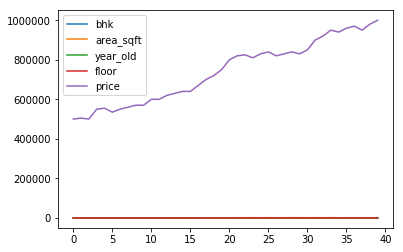

In [4]:
data.plot()

In [5]:
# Correlation of a column with other columns
data.corr() 

,bhk,area_sqft,year_old,floor,price
bhk,1.000000,0.831142,-0.125670,0.130960,0.981324
area_sqft,0.831142,1.000000,0.037635,0.152165,0.859441
year_old,-0.125670,0.037635,1.000000,0.267419,-0.118834
floor,0.130960,0.152165,0.267419,1.000000,0.175151
price,0.981324,0.859441,-0.118834,0.175151,1.000000


# checking Normality Univeriant , Multivariant

C:\Users\rakchh\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


skewness of bhk:  -0.019331978387721778
skewness of area_sqft:  0.1781625278913837
skewness of year_old:  0.31266040873691126
skewness of floor:  0.08295863603037812
kurtosis of bhk:  -1.178438403433675
kurtosis of area_sqft:  -0.9678590948985248
kurtosis of year_old:  -0.9251806743106461
kurtosis of floor:  -1.3275507272716613


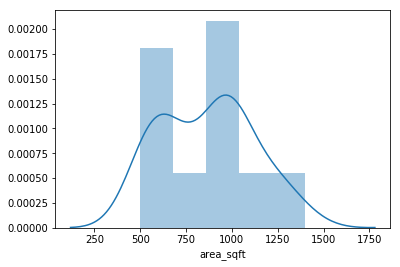

In [6]:
# Checking the Skewness(Tirchapan) and Kurtosis(Height of the graph) 
# Skewness (s) should be -1.96 < skewness < 1.96
# Kurtosis near to Zero is very good

%matplotlib inline
sb.distplot(data.area_sqft)

print('skewness of bhk: ',sp.stats.skew(data.bhk))
print('skewness of area_sqft: ',sp.stats.skew(data.area_sqft))
print('skewness of year_old: ',sp.stats.skew(data.year_old))
print('skewness of floor: ',sp.stats.skew(data.floor))

print('kurtosis of bhk: ',sp.stats.kurtosis(data.bhk))
print('kurtosis of area_sqft: ',sp.stats.kurtosis(data.area_sqft))
print('kurtosis of year_old: ',sp.stats.kurtosis(data.year_old))
print('kurtosis of floor: ',sp.stats.kurtosis(data.floor))

### Devide the columns in variables(X), and target variable(y)

In [7]:
# loc(rows-filter,column-filter)
# X (capital X) is Independent(predictive) variable, 
# which depend on x1(means col1) + x2(menas col2) + x3(means col3) + x4(means col4) + ....
# y is Dependent(Target Veriable)variable, so its small y

X = data.loc[:,['bhk','area_sqft','year_old','floor']]
y = data.loc[:,['price']]
# y= data.price

In [8]:
# show (rows, columns)

print(X.shape)
print(y.shape)

(40, 4)
(40, 1)


In [9]:
X.head()

,bhk,area_sqft,year_old,floor
0,1.0,500,1,1
1,1.0,500,1,5
2,1.0,500,1,10
3,1.0,550,5,3
4,1.0,550,5,10


In [10]:
y.head()

,price
0,500000
1,505000
2,500000
3,550000
4,555000


### Split the available data in 70% and 30% for Trainning and Testing model 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# X_train, X_test, y_train, y_test = train_test_split(X, y)
# random_state can be 2 ,4 10 14.. anything, it suffel and take rows
# train_test_split(X, y, test_size = size_need_to_take_for_testData, random_state = count_for_rendon_value)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1) 

In [13]:
print('X train shape: ',X_train.shape) # 70% data
print('Y train shape: ',y_train.shape)  # 30% data

print('X test shape: ',X_test.shape)
print('y test shape: ',y_test.shape)

print('\n X Train Data: \n',X_train.head())  # \n means new line
print('\n y Train Data: \n',y_train.head())

print('\n X Test Data: \n',X_test.head())
print('\n y Test Data: \n',y_test.head())

X train shape:  (34, 4)
Y train shape:  (34, 1)
X test shape:  (6, 4)
y test shape:  (6, 1)

 X Train Data: 
     bhk  area_sqft  year_old  floor
22  3.0       1050         5      4
39  4.5       1000         1     10
19  2.5        920         6     12
26  3.5        910         6      4
32  4.0       1000         4      6

 y Train Data: 
       price
22   825000
39  1000000
19   750000
26   820000
32   920000

 X Test Data: 
     bhk  area_sqft  year_old  floor
2   1.0        500         1     10
31  4.0       1250         1      3
3   1.0        550         5      3
21  3.0       1000         3      3
27  3.5       1100         4      7

 y Test Data: 
      price
2   500000
31  900000
3   550000
21  820000
27  830000


### Train the model using the X_train and y_train data, 
### with the use of Simple Linear Regression Algorithm

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## get y_predict by passing X_test in trained model 

In [16]:
y_predict = model_lr.predict(X_test)

In [17]:
print('y_test: ',y_test.head(6))
print('\n y_predict: \n', y_predict)

y_test:       price
2   500000
31  900000
3   550000
21  820000
27  830000
29  830000

 y_predict: 
 [[516848.39957115]
 [937293.80286031]
 [492461.30214683]
 [785266.37235854]
 [863372.58155098]
 [857740.25769914]]


# Get the score for y_test and y_predict

In [18]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

# 0.9514648967247669
# 0.95 % meand 66% changes of the prediction , 
# it should be more then 75 % to predict 

0.9430865215346602

### Now predict any value using trained model by passing inputs

In [19]:
model_lr.predict([[2,600,2,5]])

array([[630477.1467717]])

In [20]:
# predicted the price of 2-bhk , 15 sqft , 5 year old , 3 rd floor
# 2014680 Rs